# Using BigQuery to perform basic data analytics and queries:
Here's a notebook for executing SQL and then analyze the data with some visualization

## Dataset: NCAA Basketball:
- In this project, I use NCAA dataset from Google BigQuery 
- This dataset provide statistic data from NCAA Man Basketball League from 1996 - 2017

In [27]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


## Constant Variable

In [28]:
JSON = '../../Keys/sqldatascience-324214-cef9551480f9.json'

## Library

In [29]:
## Data
import pandas as pd
import numpy as np
from google.cloud import bigquery

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#warning
import warnings
warnings.filterwarnings('ignore')

## Get Data With Query

In [30]:
client = bigquery.Client.from_service_account_json(JSON)

### All Table ID in Dataset

In [31]:
mascot = 'bigquery-public-data.ncaa_basketball.mascots'
mbbGamesSr = 'bigquery-public-data.ncaa_basketball.mbb_games_sr'
mbbHistoricalTeamsGames = 'bigquery-public-data.ncaa_basketball.mbb_historical_teams_games'
mbbHistoricalTeamsSeason = 'bigquery-public-data.ncaa_basketball.mbb_historical_teams_seasons'
mbbHistoricalTournamentGames = 'bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games'
mbbPbpSr = 'bigquery-public-data.ncaa_basketball.mbb_pbp_sr'
mbbPlayersGamesSr = 'bigquery-public-data.ncaa_basketball.mbb_players_games_sr'
mbbTeams = 'bigquery-public-data.ncaa_basketball.mbb_teams'
mbbTeamsGamesSr = 'bigquery-public-data.ncaa_basketball.mbb_teams_games_sr'
teamColors = 'bigquery-public-data.ncaa_basketball.team_colors'

### Function to get schema

In [32]:
def getSchema(tableID):
    table = client.get_table(tableID)
    schema = table.schema
    colNames = [i.name for i in schema]
    colType = [i.field_type for i in schema]
    colMode = [i.mode for i in schema]
    colDesc = [i.description for i in schema]
    schemadf = pd.DataFrame({
        'Names': colNames,
        'Data Type': colType,
        'Mode': colMode,
        'Description': colDesc
    })
    return schemadf

### Get Data with Query

In [33]:
def querydf(query):
    result = client.query(query).result().to_dataframe()
    return result

## Schema Each Tables to get Information:
- This dataset has 8 Tables, but I won't use all that tables. I will use some tables to answer my question
- At this point, I just take some Schema from tables to understand the table that I use for this project

In [34]:
getSchema(mbbTeams)

,Names,Data Type,Mode,Description
0,market,STRING,NULLABLE,None
1,alias,STRING,NULLABLE,None
2,name,STRING,NULLABLE,None
3,id,STRING,NULLABLE,None
4,code_ncaa,INTEGER,NULLABLE,None
5,kaggle_team_id,INTEGER,NULLABLE,None
6,school_ncaa,STRING,NULLABLE,None
7,turner_name,STRING,NULLABLE,None
8,league_name,STRING,NULLABLE,None
9,league_alias,STRING,NULLABLE,None


In [35]:
getSchema(mbbHistoricalTeamsGames)

,Names,Data Type,Mode,Description
0,season,INTEGER,NULLABLE,[Game data] Season the game was played in
1,scheduled_date,STRING,NULLABLE,[Game data] Date the game was played
2,attendance,FLOAT,NULLABLE,[Game data] Attendance of the game
3,market,STRING,NULLABLE,[Team data] Team school name (using Sportradar...
4,name,STRING,NULLABLE,[Team data] Team name
5,team_code,STRING,NULLABLE,[Team data] School code (see http://stats.ncaa...
6,team_id,STRING,NULLABLE,[Team data] Sportradar team ID
7,alias,STRING,NULLABLE,[Team data] Team alias
8,current_division,STRING,NULLABLE,[Team data] The division the team currently pl...
9,points_game,INTEGER,NULLABLE,[Game data] Points scored by team


In [36]:
getSchema(mbbHistoricalTournamentGames)

,Names,Data Type,Mode,Description
0,season,INTEGER,NULLABLE,Year the game was played in. Note that this is...
1,round,INTEGER,NULLABLE,"Tournament round, indicated by the number of t..."
2,days_from_epoch,INTEGER,NULLABLE,"Days from epoch, as defined in the Kaggle comp..."
3,game_date,DATE,NULLABLE,Date the game was played
4,day,STRING,NULLABLE,Day of the week the game was played
5,win_seed,STRING,NULLABLE,Seed of the winning team
6,win_region,STRING,NULLABLE,"Region of the winning team, as defined in the ..."
7,win_market,STRING,NULLABLE,School name (using Sportradar names) of the wi...
8,win_name,STRING,NULLABLE,Team name of the winning team
9,win_alias,STRING,NULLABLE,Team alias of the winning team


In [37]:
getSchema(mbbPbpSr)

,Names,Data Type,Mode,Description
0,game_id,STRING,NULLABLE,Unique identifier for the game
1,load_timestamp,TIMESTAMP,NULLABLE,Time at which the data was loaded into the table
2,season,INTEGER,NULLABLE,Season the game was played in
3,status,STRING,NULLABLE,
4,scheduled_date,TIMESTAMP,NULLABLE,Date the game was played
...,...,...,...,...
66,three_point_shot,BOOLEAN,NULLABLE,Boolean value indicating whether the event was...
67,points_scored,FLOAT,NULLABLE,Number of points scored on the play
68,turnover_type,STRING,NULLABLE,Type of turnover
69,rebound_type,STRING,NULLABLE,Indicator of whether a rebound was offensive o...


In [38]:
getSchema(mbbTeamsGamesSr)

,Names,Data Type,Mode,Description
0,game_id,STRING,NULLABLE,[Game data] Unique identifier for the game
1,season,INTEGER,NULLABLE,[Game data] Season the game was played in
2,status,STRING,NULLABLE,[Game data] Indicates the last state of Sportr...
3,coverage,STRING,NULLABLE,[Game data] Type of coverage provided by Sport...
4,neutral_site,BOOLEAN,NULLABLE,[Game data] Type of coverage provided by Sport...
...,...,...,...,...
127,opp_flagrant_fouls,INTEGER,NULLABLE,[Opponent stats] Flagrant fouls committed
128,opp_player_tech_fouls,INTEGER,NULLABLE,[Opponent stats] Technical fouls committed
129,opp_team_tech_fouls,INTEGER,NULLABLE,[Opponent stats] Technical fouls committed by ...
130,opp_coach_tech_fouls,INTEGER,NULLABLE,[Opponent stats] Technical fouls committed by ...


In [39]:
getSchema(mascot)

,Names,Data Type,Mode,Description
0,id,STRING,NULLABLE,University unique ID from Sportradar
1,market,STRING,NULLABLE,The university to which the mascot belongs
2,name,STRING,NULLABLE,The name of the university’s team
3,mascot,STRING,NULLABLE,The name of the university's mascot
4,mascot_name,STRING,NULLABLE,"The proper name of the university's mascot, if..."
5,mascot_common_name,STRING,NULLABLE,The type of being or creature that the mascot ...
6,tax_subspecies,STRING,NULLABLE,The subspecies to which the mascot belongs
7,tax_species,STRING,NULLABLE,The species to which the mascot belongs
8,tax_genus,STRING,NULLABLE,The genus to which the mascot belongs
9,tax_family,STRING,NULLABLE,The family to which the mascot belongs


## Analytics Question for NCAA Dataset:

Tables list: 
- mascot
- mbbGamesSr
- mbbHistoricalTeamsGames
- mbbHistoricalTeamsSeason
- mbbHistoricalTournamentGames
- mbbPbpSr
- mbbPlayersGamesSr
- mbbTeams
- mbbTeamsGamesSr
- teamColors

### 1. How many games has each team plays in the NCAAM (NCAA Man) league since 2010?

In [40]:
q1sql = querydf(
    f'''
    WITH tempTable AS (
        SELECT team_id, COUNT(team_id) AS total
        FROM {mbbHistoricalTeamsGames}
        WHERE season >= 2010
        GROUP BY team_id
    )
    SELECT t.alias, t.name, t.school_ncaa, tt.total
    FROM {mbbTeams} t
    LEFT JOIN tempTable tt ON t.id = tt.team_id
    WHERE t.league_alias = "NCAAM"
    ORDER BY total DESC
    '''
)

q1sql

,alias,name,school_ncaa,total
0,UK,Wildcats,Kentucky,264
1,UNC,Tar Heels,North Carolina,263
2,KU,Jayhawks,Kansas,259
3,ORE,Ducks,Oregon,257
4,WIS,Badgers,Wisconsin,255
...,...,...,...,...
346,SIUE,Cougars,SIUE,200
347,AC,Wildcats,Abilene Christian,199
348,DART,Big Green,Dartmouth,198
349,IW,Cardinals,Incarnate Word,191


- To make it easier to understand, I will do visualization and I will only take the 10 teams with the most number of games

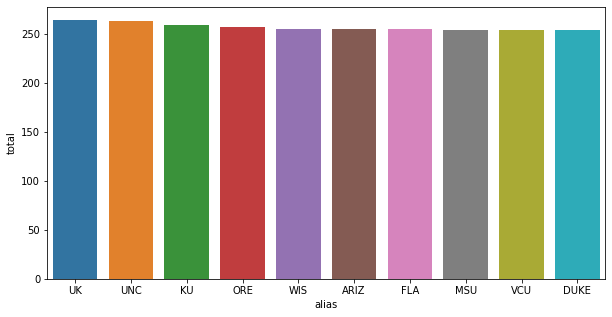

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x = "alias", y = 'total', data = q1sql[:10])
plt.show()

- Number of games each teams in a season depends on several factors, such as:
    - Team involvement in participating in non-conference multi events or MTE. Teams that don't participate in an MTE can play up to 29 regular-season games
    - In conference, if the team can qualifies for conference tournaments, especially until final, their number of games can up to 5 games
- Because of that, my hypothesis is these 10 teams have have entered semifinals. So, I need to check which team has reached the semifinals since 2010?

### 2. Which team has reached the semifinals since 2010?

In [42]:
q2sql = querydf(
    f'''
    SELECT win_alias AS team, COUNT(win_alias) AS total_reached_semifinals_or_finals
    FROM {mbbHistoricalTournamentGames} 
    WHERE round = 8 AND season >= 2010
    GROUP BY win_alias
    ORDER BY total_reached_semifinals_or_finals DESC 
    '''
)

q2sql

,team,total_reached_semifinals_or_finals
0,UK,4
1,MSU,2
2,SYR,2
3,UNC,2
4,CONN,2
5,DUKE,2
6,BUT,2
7,LOU,2
8,WIS,2
9,OSU,1


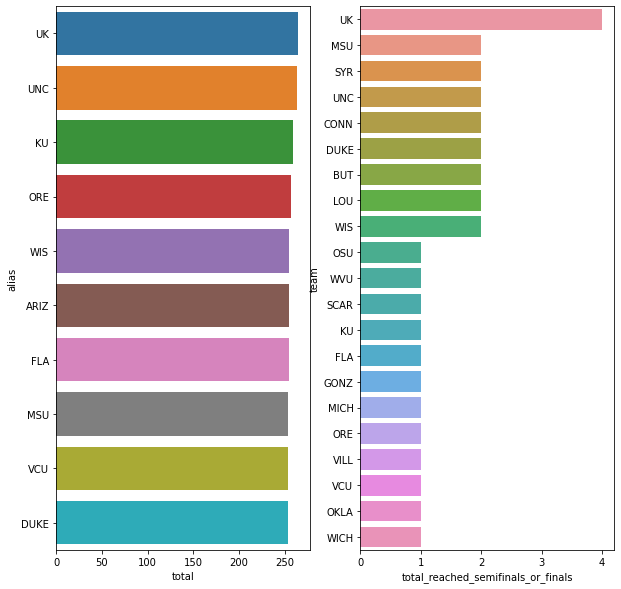

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.barplot(x = 'total', y = 'alias', data = q1sql[:10])

plt.subplot(1,2,2)
sns.barplot(x = 'total_reached_semifinals_or_finals', y = 'team', data = q2sql)
plt.show()

In [44]:
# Teams that rarely advances to the semifinals/finals
q1sql.iloc[:10]['alias'].isin(q2sql['team'])

0     True
1     True
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: alias, dtype: bool

In [45]:
q1sql.iloc[5]

alias              ARIZ
name           Wildcats
school_ncaa     Arizona
total               255
Name: 5, dtype: object


- There is only 1 team that never qualify into semifinals/finals, but their number of games into the top ten since 2010
- I think ARIZ team is a outliers in this data because only that team never made it to the semifinals/finals since 2010, most likely this team often involved in participating in non-conference or MTE

### 3. Is there a correlation between the numbers of wins and the numbers of three points made since 2010?

In [46]:
q3sql = querydf(
    f'''
    SELECT alias, 
           SUM(three_points_made) AS total_three_point,
           SUM(CASE WHEN win = True THEN 1 END) AS total_win
    FROM {mbbTeamsGamesSr}
    WHERE season >= 2010
    GROUP BY alias
    ORDER BY total_win DESC
    '''
)

q3sql.head()

,alias,total_three_point,total_win
0,VILL,1752.0,165.0
1,GONZ,1338.0,161.0
2,UK,1112.0,152.0
3,ARIZ,1099.0,151.0
4,WICH,1349.0,147.0


- Before I check the correlation, I want to check distribution of "total_three_point" and "total_win". 
- I will check use histogram plot

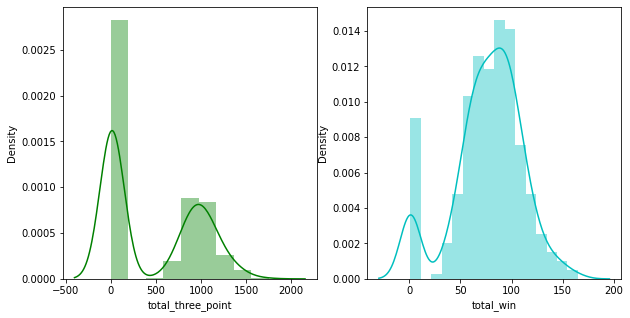

In [47]:
#Plot hist
plt.figure(figsize=(10,5))
#total_three_point
plt.subplot(1,2,1)
sns.distplot(q3sql['total_three_point'], color='g')

plt.subplot(1,2,2)
sns.distplot(q3sql['total_win'], color='c')

plt.show()

- Neither "total_three_point" nor "total_win". They are not normally distributed. So I can use "Spearmann Method" and scatter plot to check their correlation

Correlation between 'total_three_point' and 'total_win':  0.650160321452472 



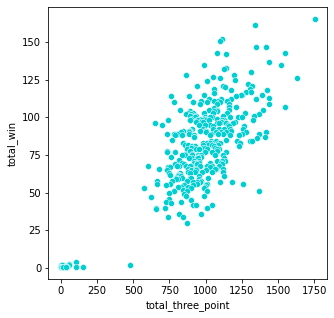

In [48]:
#Spearman Method
print("Correlation between 'total_three_point' and 'total_win': ", q3sql['total_three_point'].corr(q3sql['total_win'], method = 'spearman'), '\n')

#Scatterplot
plt.figure(figsize=(5,5))
sns.scatterplot(x='total_three_point', y = 'total_win', data = q3sql, color = 'darkturquoise')
plt.show()

#### Answer Question 3:
- There is correlation between three point they made and number of winning. It is indicated by their correlation coefficient, 0.65 with positive correlation. It's means when the team's three points increase, the number of wins get also increase

### 4. Is there a correlation between the numbers of wins and the numbers of rebound of each team made since 2010?
- In basketball, there is some quote "The one who controls the rebound will controls the game". To prove it, I will check correlation between the numbers of wins and the numbers of rebound of each team made since 2010

In [49]:
q4sql = querydf(
    f'''
    SELECT alias, 
           SUM(rebounds) AS total_rebound,
           SUM(CASE WHEN win = True THEN 1 END) AS total_win
    FROM {mbbTeamsGamesSr}
    WHERE season >= 2010
    GROUP BY alias
    ORDER BY total_win DESC
    '''
)

q4sql.head()

,alias,total_rebound,total_win
0,VILL,6050.0,165.0
1,GONZ,6182.0,161.0
2,UK,6885.0,152.0
3,ARIZ,6354.0,151.0
4,WICH,6079.0,147.0


- To check the correlation, the process still same: First, I will check their distribution with histogam plot and then their correlation through statistic method and scatter plot

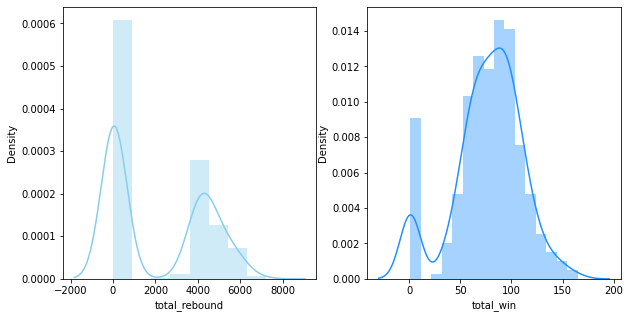

In [50]:
#Plot hist
plt.figure(figsize=(10,5))
#total_three_point
plt.subplot(1,2,1)
sns.distplot(q4sql['total_rebound'], color='skyblue')

plt.subplot(1,2,2)
sns.distplot(q4sql['total_win'], color='dodgerblue')

plt.show()

- The result looks like before, neither "total_rebound" nor "total_win" normally distributed. So, I will use "Spearmann Method" too

Correlation between 'total_three_point' and 'total_win':  0.7608411112409582 



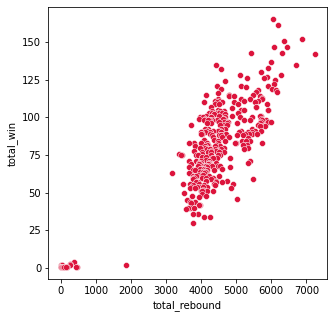

In [51]:
#Spearman Method
print("Correlation between 'total_three_point' and 'total_win': ", q4sql['total_rebound'].corr(q4sql['total_win'], method = 'spearman'), '\n')

#Scatterplot
plt.figure(figsize=(5,5))
sns.scatterplot(x='total_rebound', y = 'total_win', data = q4sql, color = 'crimson')
plt.show()

#### Answer Question 4:
- There is correlation between total rebound they made and number of winning. It is indicated by their correlation coefficient, 0.75 with positive correlation. It's means when the team's rebound increase, the number of wins get also increase
- So, it is indicates that quotes right

### 5. What is the name of the mascot of the team that has won the tournament since 2010? 

In [52]:
q5sql = querydf(
    f'''
    WITH tempTable AS(
    SELECT win_team_id AS team,
           COUNT(win_alias) AS total_championship
    FROM {mbbHistoricalTournamentGames} 
    WHERE season >= 2010 AND round = 2
    GROUP BY win_team_id
    ORDER BY total_championship DESC)
    SELECT t.alias,
           tt.total_championship,
           m.mascot,
           m.mascot_name
    FROM tempTable tt 
    LEFT JOIN {mbbTeams} t ON tt.team = t.id
    LEFT JOIN {mascot} m ON t.id = m.id
    '''
)

q5sql

,alias,total_championship,mascot,mascot_name
0,CONN,2,Husky,Jonathan
1,DUKE,2,Devil,None
2,UK,1,Wildcat,Scratch
3,LOU,1,Cardinal,Louie
4,VILL,1,Wildcat,Will D. Cat
5,UNC,1,Sheep,Rameses


<h1>Mascot Picture Of Team</h1>
<ol>
    <strong><li>CONN:</li></strong>
    <img src="https://nusc.uconn.edu/wp-content/uploads/sites/3140/2015/11/jonathan.jpg", width = "200", height = "200">
    <p>
    <strong><li>DUKE:</li></strong>
    <img src="https://cdn.vox-cdn.com/thumbor/E1e41B9dRvRToec0gF1nAKuPYLw=/0x0:1990x2984/1200x800/filters:focal(814x770:1132x1088)/cdn.vox-cdn.com/uploads/chorus_image/image/63961497/937905766.jpg.0.jpg", width = "200", height = "200">
    <p>
    <strong><li>UK:</li></strong>
    <img src="https://cdn.cnn.com/cnnnext/dam/assets/120319082415-kentucky-sweet-16-mascot-horizontal-large-gallery.jpg", width = "200", height = "200">
    <p>
    <strong><li>LOU:</li></strong>
    <img src="http://gocards.com/common/controls/image_handler.aspx?thumb_id=13&image_path=/images/2017/1/4/Louie_Go_Cards_dot_com.jpg", width = "200", height = "200">
    <p>
    <strong><li>VILL:</li></strong>
    <img src="https://c8.alamy.com/comp/FK1YYM/philadelphia-pennsylvania-usa-5th-mar-2016-villanova-wildcats-mascot-FK1YYM.jpg", width = "200", height = "200">
    <p>
    <strong><li>UNC:</li></strong>
    <img src="https://blogs.lib.unc.edu/hill/wp-content/uploads/sites/2/2016/03/Current-Rameses-.jpg", width = "200", height = "200">
    <p>
</ol>

# Thank You!